In [1]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
# from skimage import io # import tiff file as ndarray
import tifffile as tf
import pickle
from skimage.segmentation import find_boundaries # for generating boundaries
from scipy.ndimage import gaussian_filter # for applying gaussian filter for density plots
from time import time # used to time scripts


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

import matplotlib.pyplot as plt # had to move cuz plt coded as matplotlib?

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
home_dir="/mnt/labNAS/"
in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")
metadata

,brain,species,inj_site,shape
0,ACC_MMus_230403_b1,MMus,ACC,NaN
1,ACC_MMus_230404_b2,MMus,ACC,NaN
2,ACC_MMus_230427_b3,MMus,ACC,NaN
3,ACC_STeg_230308_b1,STeg,ACC,NaN
4,ACC_STeg_230322_b2,STeg,ACC,NaN
5,ACC_STeg_230501_b3,STeg,ACC,NaN
6,OMC_MMus_220119_b0,MMus,OMC,NaN
7,OMC_MMus_220303_b1,MMus,OMC,NaN
8,OMC_MMus_220324_b2,MMus,OMC,NaN
9,OMC_STeg_220208_b0,STeg,OMC,NaN


In [8]:
# load images
sti = 11
mmi = 8

In [10]:
st_im = tf.imread(in_path+"norm_subtracted/STeg_220429_aligned/"+metadata.loc[sti,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif")
mm_im = tf.imread(in_path+"norm_subtracted/STeg_220429_aligned/"+metadata.loc[mmi,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif")


In [12]:
# load masks
# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS"]
# load masks for each individually aligned brain
mask_folder = in_path+"masks/steg_220429_hs_asr/"


start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    with open(mask_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        mask_dict[area] = np.load(f)


end = time()
print("took", end-start, "seconds to load")

working on grey
working on CTX
working on OMCc
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
took 15.02774453163147 seconds to load


In [13]:
# set image parameters
ar = 1 # aspect ratio of all images
gs = 3 # sigma to use for gaussian smoothing
save_dpi = 300


# side by side color

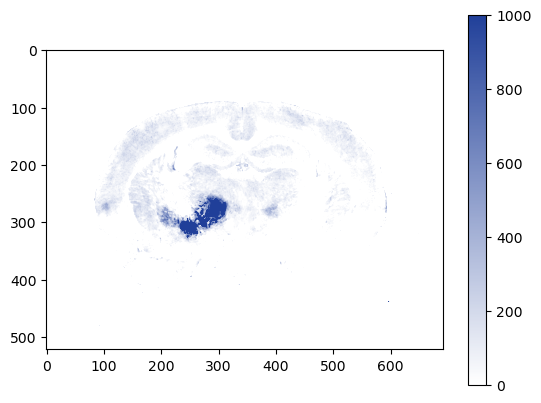

In [27]:
plt.imshow(mm_im[95], cmap=blue_cmp, vmin=0, vmax=1000)
plt.colorbar()

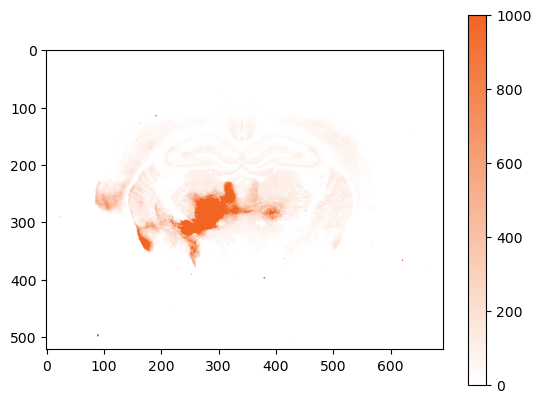

In [26]:
plt.imshow(st_im[95], cmap=orange_cmp, vmin=0, vmax=1000)
plt.colorbar()

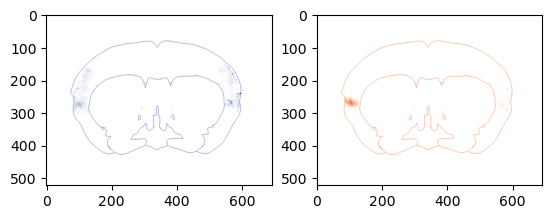

In [59]:
aud_mask = mask_dict['aud']

fig, axs = plt.subplots(1,2)

st_aud = np.max(aud_mask * st_im, axis=0)
mm_aud = np.max(aud_mask * mm_im, axis=0)

plot_areas = ["grey", "CTX", "CP", "STR"]
aud_bound = make_boundaries_dict(plot_areas, mask_dict, roi="aud",
                                 scaling_factor=500)

axs[0].imshow(np.maximum(mm_aud, aud_bound), cmap=blue_cmp, vmin=0, vmax=1000)
axs[0].axis('off')

axs[1].imshow(np.maximum(st_aud, aud_bound), cmap=orange_cmp, vmin=0, vmax=1000)
axs[1].axis('off')

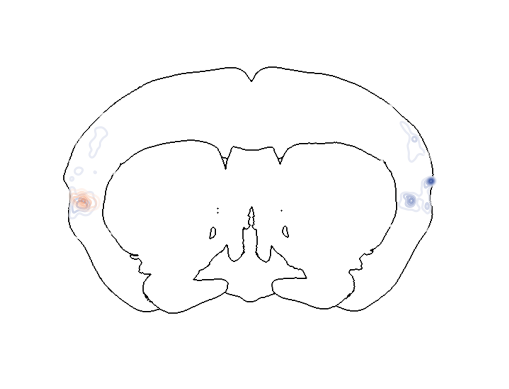

In [71]:
# contours
plot_contour_species(mm_im, st_im, mask_dict=mask_dict, 
                     plot_areas=["grey", "CTX", "CP", "STR"],
                     roi="aud", alpha_mm=0.75, alpha_st=0.5)

# OMC PAG

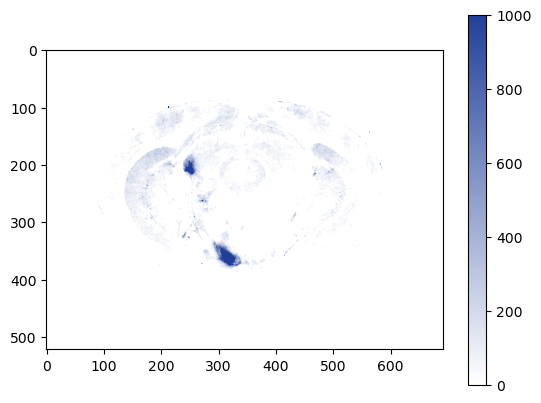

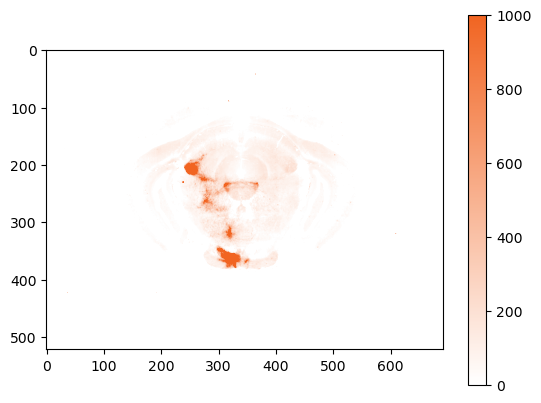

In [83]:

plt.imshow(mm_im[145], cmap=blue_cmp, vmin=0, vmax=1000)
plt.colorbar()
plt.show()
plt.imshow(st_im[145], cmap=orange_cmp, vmin=0, vmax=1000)
plt.colorbar()
plt.show()

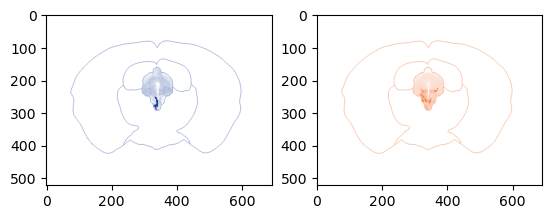

In [91]:
pag_mask = mask_dict["PAG"]


fig, axs = plt.subplots(1,2)

st_pag = np.max(pag_mask * st_im, axis=0)
mm_pag = np.max(pag_mask * mm_im, axis=0)

plot_areas = ["grey", "CTX", "SCm", "PAG"]
pag_bound = make_boundaries_dict(plot_areas, mask_dict, roi="PAG",
                                 scaling_factor=500)

axs[0].imshow(np.maximum(mm_pag, pag_bound), cmap=blue_cmp, vmin=0, vmax=1000)
axs[1].imshow(np.maximum(st_pag, pag_bound), cmap=orange_cmp, vmin=0, vmax=1000)


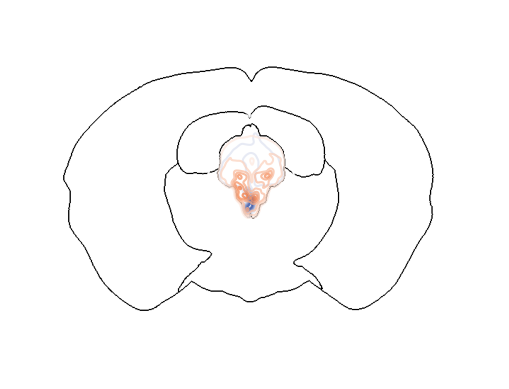

In [96]:

# contours
plot_contour_species(mm_im, st_im, mask_dict=mask_dict, 
                     plot_areas=["grey", "CTX", "SCm", "PAG"],
                     roi="PAG", alpha_mm=0.75, alpha_st=0.75)

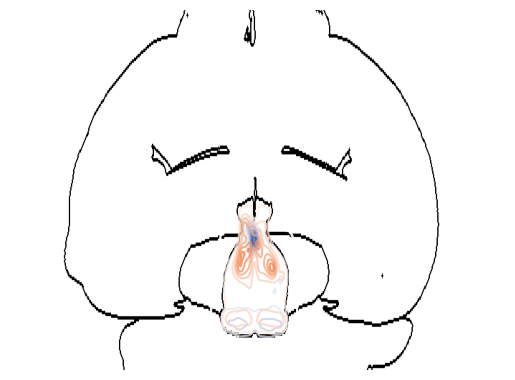

In [97]:
# contours
plot_contour_species(mm_im, st_im, mask_dict=mask_dict, 
                     plot_areas=["grey", "CTX", "SCm", "PAG"],
                     roi="PAG", alpha_mm=0.75, alpha_st=0.75,
                     view="top")

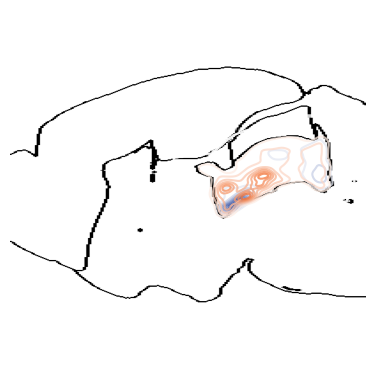

In [98]:
# contours
plot_contour_species(mm_im, st_im, mask_dict=mask_dict, 
                     plot_areas=["grey", "CTX", "SCm", "PAG"],
                     roi="PAG", alpha_mm=0.75, alpha_st=0.75,
                     view="side")